# Simulations of the semi-discrete prey-predator models

In [1]:
#Dependancies
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

## 1. Model without interaction

### 1.1 Only continuous model

In [4]:
#Definition of the continuous model
def cont_model(
    x0y0: list,
    r: float = 0.5,
    K: float = 10,
    a: float = 20,
    c: float = 20,
    m: float = 0.5,
    gamma: float = 0.8,
) -> list:
    
    '''This model is a continuous model that describes the evolution of a pest population x and a predator population y 
    
    Param:
        x0y0: a list of initial values [x0, y0]
        r: growth rate
        K: carrying capacity
        a: search rate
        c: half-saturation constant
        m: death rate
        gamma: conversion factor
        
    Return:
        xy: a list of the two population size of x and y'''
    
    #Initialisation
    x = x0y0[0]
    y = x0y0[1]

    #Equations of the derivative of x and y
    dx = r*x * (1 - x/K) - a*x*(c + x) * y
    dy = gamma * a*x*(c + x) * y - m*y

    return dx, dy

In [13]:
#Simulations

##Initialisation
x0y0 = [2, 1]

##Time points
t = np.linspace(0,20,1000)


In [14]:
#Solve ODE
cont_xy = odeint(cont_model, x0y0, t)

The warning above might be due to the fact that it is not semi-discrete. The models behavior may be impacted to the fact that there is no discrete part. That is what we are going to check. But to remember, this part about the continuous model is just to be sure that everything works. We start with something simple befode something complicated.

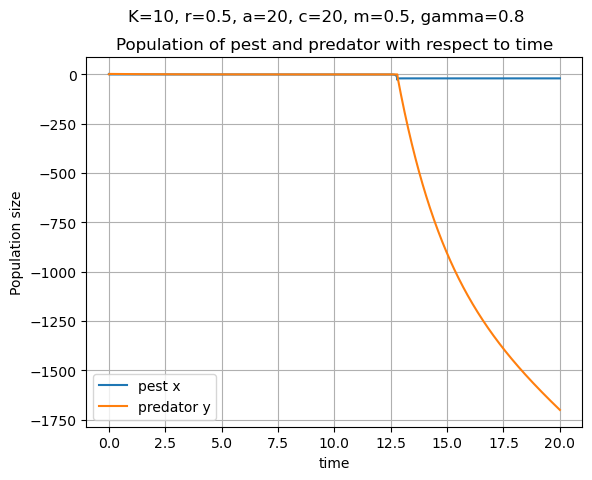

In [15]:
#Plot results
plt.plot(t, cont_xy.T[0], label = 'pest x')
plt.plot(t, cont_xy.T[1], label = 'predator y')
plt.xlabel('time')
plt.ylabel('Population size')
plt.title('Population of pest and predator with respect to time')
plt.suptitle('K=10, r=0.5, a=20, c=20, m=0.5, gamma=0.8')
plt.legend()
plt.grid()
plt.show()

Indeed, the behaviour of the graph is strange, reaching high absolute values, even negative. But we were prepared from strange behaviour because there is no discrete part. Now, we can focus on adding a discrete part.

In [18]:
#Just to see the content of the result of an odeint
x1y1 = odeint(cont_model, x0y0, [0,1])
print(x1y1)

[[2.00000000e+00 1.00000000e+00]
 [1.24062211e-11 1.57766723e+00]]


The first element of x1y1 is x0y0.  
The second element is the solution (x,y) at (1,1).

### 1.2 Semi-discrete model

In [14]:
#Definition of the semi-discrete model
def sd_model(
    x0y0: list,
    r: float = 0.5,
    K: float = 10,
    a: float = 20,
    c: float = 20,
    m: float = 0.5,
    gamma: float = 0.8,
) -> list:
    
    '''This model is a continuous model that describes the evolution of a pest population x and a predator population y 
    
    Param:
        x0y0: a list of initial values [x0, y0]
        r: growth rate
        K: carrying capacity
        a: search rate
        c: half-saturation constant
        m: death rate
        gamma: conversion factor
        
    Return:
        xy: a list of the two population size of x and y'''
    
    #Initialisation
    x = x0y0[0]
    y = x0y0[1]

    #Continuous part of the model
    dx = r*x * (1 - x/K) - a*x*(c + x) * y
    dy = gamma * a*x*(c + x) * y - m*y

    return dx, dy

#Definition of the parameters of the discrete part mu and T
    ##mu: release rate
    ##T: release period 
mu = 1
T = 5

#Initial condition
##Definition of y0 as the "equilibrium"
m=0.5
y0 = mu*T/(1 - np.exp(-m*T))
x0y0 = [0, y0]

#Time points
t = np.linspace(0,20,201)

#Store solution in arrays
x = np.empty_like(t)
y = np.empty_like(t)

#Record initial conditions
x[0] = x0y0[0]
y[0] = x0y0[1]





release period at 5.0
release period at 10.0
release period at 15.0


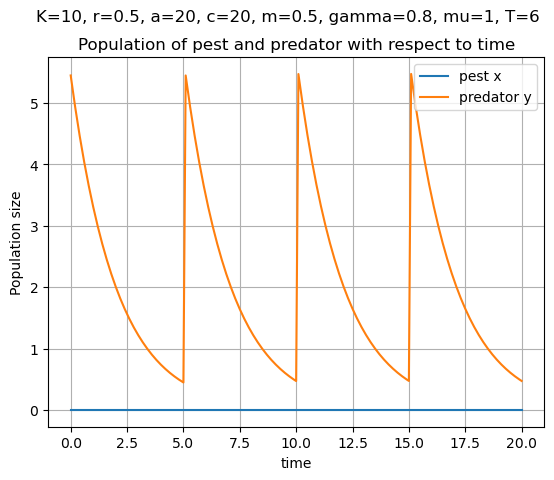

In [15]:
#Solve ODE
##we solve the ode point by point and change the equation to the discrete if t is a multiple of T
##It means that we use the value of a point to get the value of the next
for i in range(1,len(t)):
    #Span for next time step
    tspan = [t[i-1],t[i]] 
    #Solve for next step
    xy = odeint(sd_model,x0y0,tspan)
    x[i] = xy[1][0] #store the value of x
    if t[i-1] % T == 0 and t[i-1] > 0:
        print('release period at', t[i-1])
        y[i] = y[i-1] + mu*T #store the value of y if t is a multiple of T
    else:
        y[i] = xy[1][1] #store the value of y if t is not a multiple of T
    #next initial condition
    x0y0 = [x[i],y[i]]


    
#Plot results
plt.plot(t, x, label = 'pest x')
plt.plot(t, y, label = 'predator y')
plt.xlabel('time')
plt.ylabel('Population size')
plt.title('Population of pest and predator with respect to time')
plt.suptitle('K=10, r=0.5, a=20, c=20, m=0.5, gamma=0.8, mu=1, T=6')
plt.legend()
plt.grid()
plt.show()

What can be improved is that the jump is at the beginning. Maybe we can change that in the modulo part or the [i] vs [i-1] part of the model.

## 1.3 Simulations of the periodic solution and many different initial values

Check if the condition of GAS is filled

$\mu = 1$  
$c > K$  
$\frac{rmc}{a} = 0.25$  
$\mu > \frac{rmc}{a}$  
The condition is satisfied.


Later, we can do simulations where only LAS condition is satisfied, then when even LAS condition is not satisfied.

Implement the functions $x_p(t)$ and $y_p(t)$, the periodic solution

In [16]:
#x_p(t) will be defined as np.zeros_like(t)

#y_p(t)
def y_p(t, m, mu, T):
    '''This function is the periodic solution of y
    
    Param:
        t: time point(s)
        m: mortality rate in the model
        mu: release rate in the model
        T: release period in the model
        
    Return:
        result: y_p evaluated in t'''
    
    result = mu*T/(1 - np.exp(-m*T)) * np.exp(-m * (t % T))
    return result

Initialization of the model

In [17]:
#Definition of the parameters of the discrete part mu and T
    ##mu: release rate
    ##T: release period 
mu = 1
T = 5

#Time points
t = np.linspace(0,20,201)

#periodic solution
x_periodic = np.zeros_like(t) 
y_periodic = y_p(t, m=0.5, mu=mu, T=5)

First initial conditions

In [18]:

##Initial condition
x0_a = 0.1 
y0_a = 1.5
x0y0_a = [x0_a, y0_a]


#Store solution in arrays
x_a = np.empty_like(t)
y_a = np.empty_like(t)

#Record initial conditions
x_a[0] = x0y0_a[0]
y_a[0] = x0y0_a[1]

Solve ODE

In [21]:
for i in range(1,len(t)):
    #Span for next time step
    tspan = [t[i-1],t[i]] 
    #Solve for next step
    xy_a = odeint(sd_model,x0y0_a,tspan)
    x_a[i] = xy_a[1][0] #store the value of x
    if t[i-1] % T == 0 and t[i-1] > 0:
        print('release period at', t[i-1])
        y_a[i] = y_a[i-1] + mu*T #store the value of y if t is a multiple of T
    else:
        y_a[i] = xy_a[1][1] #store the value of y if t is not a multiple of T
    #next initial condition
    x0y0_a = [x_a[i],y_a[i]]

release period at 5.0
release period at 10.0
release period at 15.0


Plot results

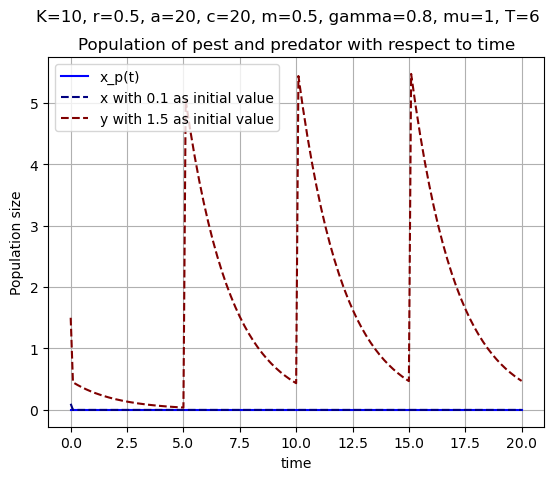

In [22]:
plt.plot(t, x_periodic, color = (0,0,1), label = 'x_p(t)')
#plt.plot(t, y_periodic, color = (1,0,0), label = 'y_p(t)')
plt.plot(t, x_a, color = (0,0,0.5), linestyle='--', label='x with 0.1 as initial value')
plt.plot(t, y_a, color = (0.5,0,0), linestyle='--', label='y with 1.5 as initial value')
plt.xlabel('time')
plt.ylabel('Population size')
plt.title('Population of pest and predator with respect to time')
plt.suptitle('K=10, r=0.5, a=20, c=20, m=0.5, gamma=0.8, mu=1, T=6')
plt.legend()
plt.grid()
plt.show()